In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("ex1data2.txt", delimiter = ',', usecols=(0,1,2), unpack = True)

In [3]:
X = np.transpose(np.array(data[:-1]))      #X->[m,n]
Y = np.transpose(np.array(data[-1:]))      #Y->[m,1]
X = np.insert(X,0,1, axis = 1)             #X->[m,n+1]
means = []
stds = []
Xnorm = X.copy()
X.shape[1]
for j in range(X.shape[1]):
    means.append(np.mean(Xnorm[:,j]))
    stds.append(np.std(Xnorm[:,j]))
    if not j: continue
    Xnorm[:,j] = (X[:,j] - means[-1])/stds[-1]

In [4]:
def hValue(Xnorm,theta):
    return np.dot(Xnorm,theta)

def costValue(Xnorm,y,theta):
    m = Xnorm.shape[0]
    return (1/(2*m))*np.sum(((hValue(Xnorm,theta)-y).T).dot(hValue(Xnorm,theta)-y))

def grDesc(Xnorm, y,initial_theta, iterations, alpha):
    oldTheta = initial_theta   
    m = Xnorm.shape[0]
    jvec=[]
    for i in range(iterations):
        newTheta = oldTheta
        jvec.append(costValue(Xnorm,y,newTheta))
        for j in range(len(oldTheta)):
            newTheta[j][0] = oldTheta[j][0] - (alpha/m)*np.sum((hValue(Xnorm,oldTheta).reshape(m,1)-y)*Xnorm[:,j].reshape(m,1))
        oldTheta = newTheta
    return newTheta, jvec

In [5]:
initialTheta = np.zeros((Xnorm.shape[1],1))
print(initialTheta.shape)
theta, jvec = grDesc(Xnorm, Y, initialTheta, 1500, 0.01)
print(theta)

(3, 1)
[[340412.56301439]
 [109371.67272252]
 [ -6502.3992545 ]]


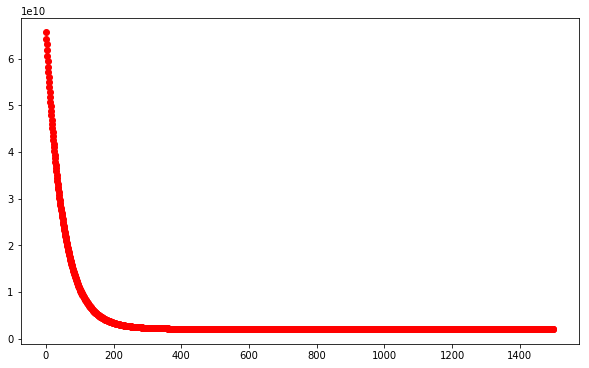

In [6]:
plt.figure(figsize=(10,6))
plt.plot(range(len(jvec)),jvec,'ro')


In [7]:
inp = np.array([1650.,3.])
value = ([((inp[x] - means[x+1])/stds[x+1]) for x in range(len(inp))])
value.insert(0,1)
print(hValue(value,theta))

[293098.14924754]
